In [2]:
#import packages here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

%matplotlib inline


In [3]:
#import data here 

train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')

In [4]:
print(train_data.head(5))
print(train_data.shape)
train_data.info()

     id neighbourhood        room_type  minimum_nights  number_of_reviews  \
0   727       Palermo  Entire home/apt               1                170   
1  6274    Colegiales     Private room               1                 11   
2  6025      Recoleta  Entire home/apt               3                  2   
3  8931      Recoleta  Entire home/apt               2                  1   
4  7524   San Nicolás  Entire home/apt               2                 31   

  last_review  reviews_per_month  calculated_host_listings_count  \
0     5/12/20               2.48                               4   
1      7/1/19               0.57                               1   
2    11/23/19               0.08                              19   
3     11/1/19               0.13                               1   
4    12/26/19               1.54                               5   

   availability_365 host_since  ... cleaning_fee  guests_included  \
0               346     8/1/13  ...         2092           

In [5]:
print(train_data.nunique())
dups = train_data.duplicated()
print(dups.any())
#no duplicated data

id                                  9681
neighbourhood                         45
room_type                              4
minimum_nights                        48
number_of_reviews                    248
last_review                         1190
reviews_per_month                    504
calculated_host_listings_count        47
availability_365                     361
host_since                          2762
host_is_superhost                      2
bathrooms                             18
bedrooms                              13
beds                                  18
bed_type                               5
cleaning_fee                         589
guests_included                       14
extra_people                         348
maximum_nights                       168
instant_bookable                       2
is_business_travel_ready               1
cancellation_policy                    5
require_guest_profile_picture          2
require_guest_phone_verification       2
price           

In [6]:
train_data.neighbourhood.unique()

array(['Palermo', 'Colegiales', 'Recoleta', 'San Nicolás', 'Caballito',
       'Núñez', 'Balvanera', 'Constitución', 'Monserrat', 'Retiro',
       'San Telmo', 'Belgrano', 'Villa Devoto', 'Puerto Madero',
       'Almagro', 'Villa Santa Rita', 'Villa Crespo', 'Villa Urquiza',
       'Parque Patricios', 'Coghlan', 'Flores', 'Barracas', 'Agronomía',
       'Chacarita', 'Villa Ortúzar', 'Villa del Parque', 'Saavedra',
       'Villa Pueyrredón', 'Parque Chacabuco', 'Parque Chas', 'Boedo',
       'Monte Castro', 'Floresta', 'La Paternal', 'La Boca',
       'San Cristóbal', 'Villa Luro', 'Liniers', 'Mataderos',
       'Villa General Mitre', 'Parque Avellaneda', 'Nueva Pompeya',
       'Versalles', 'Vélez Sársfield', 'Villa Real'], dtype=object)

In [7]:
print(train_data['neighbourhood'].value_counts())

Palermo                3302
Recoleta               1661
San Nicolás             595
Retiro                  495
Belgrano                416
Monserrat               390
San Telmo               389
Almagro                 379
Balvanera               365
Villa Crespo            310
Colegiales              183
Núñez                   175
Chacarita               168
Caballito               143
Puerto Madero           112
Villa Urquiza            84
Barracas                 58
Constitución             57
Saavedra                 41
La Boca                  39
Boedo                    35
Flores                   30
Coghlan                  28
Villa Ortúzar            26
Parque Patricios         24
Villa Devoto             22
San Cristóbal            19
Villa del Parque         19
Parque Chacabuco         18
Parque Chas              17
Agronomía                15
Villa General Mitre      10
Villa Pueyrredón          9
Liniers                   8
Vélez Sársfield           6
Floresta            

neighbourhood
room_type
minimum_nights
calculated_host_listings_count
host_is_superhost
bathrooms
bedrooms
beds
bed_type
guests_included
instant_bookable
is_business_travel_ready
cancellation_policy
require_guest_profile_picture
require_guest_phone_verification
price


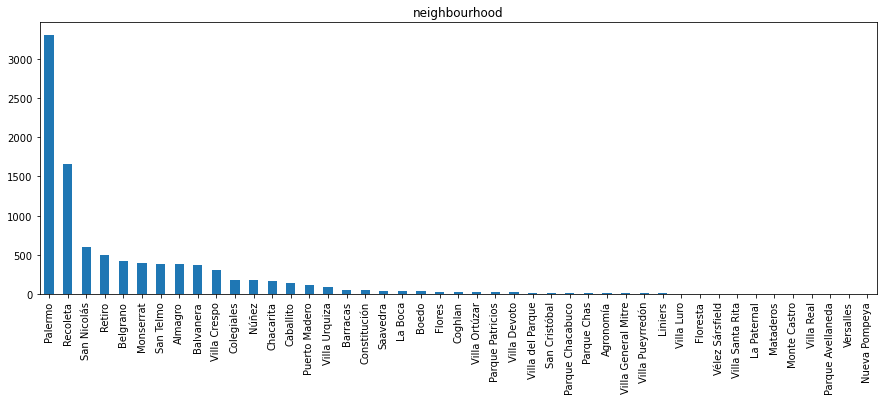

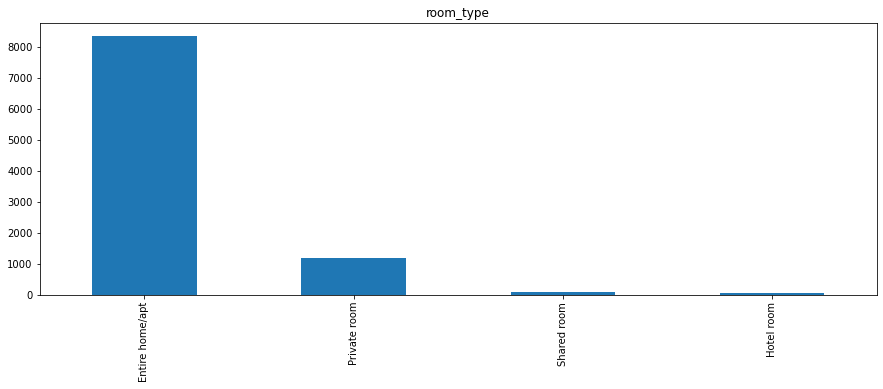

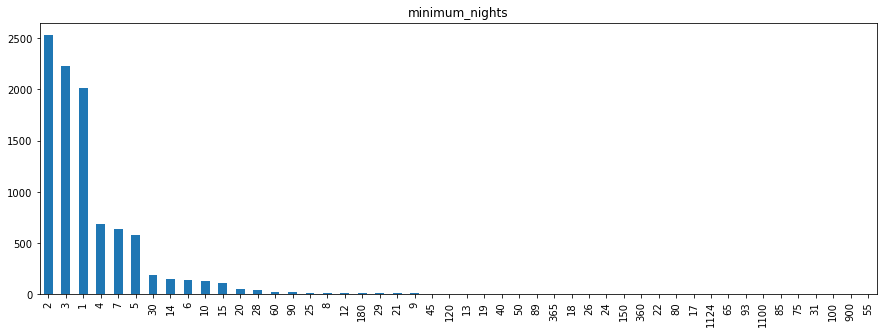

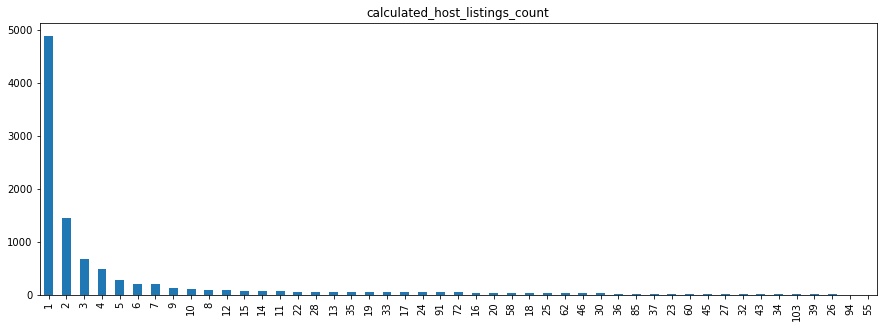

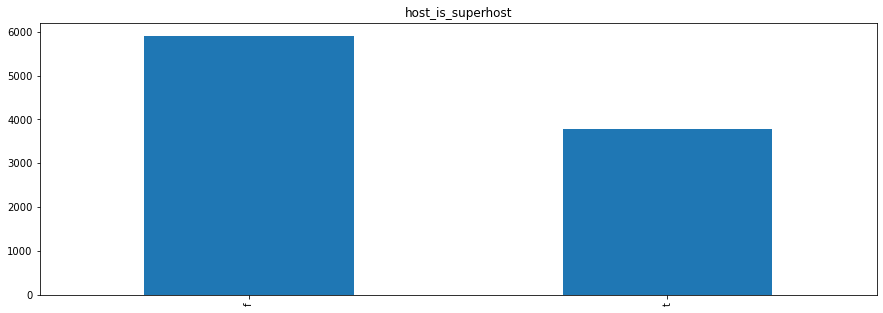

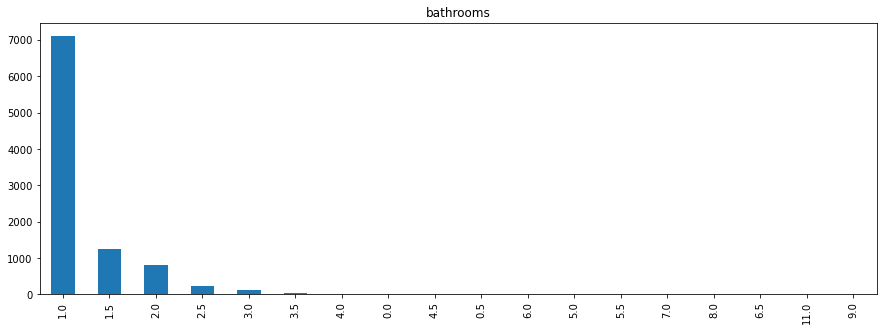

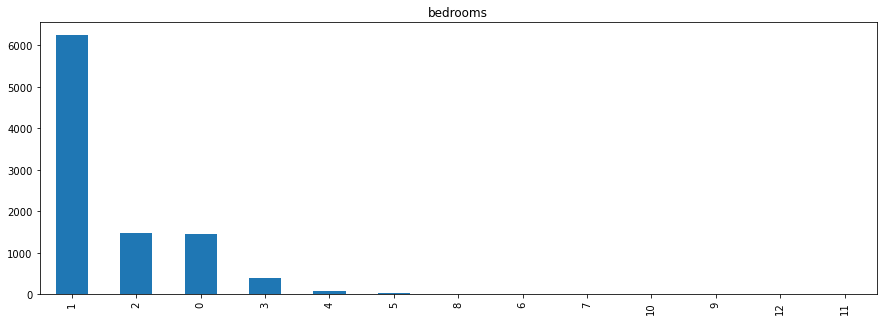

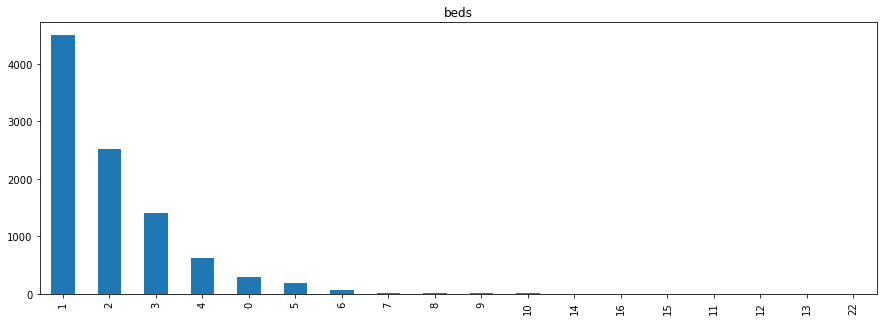

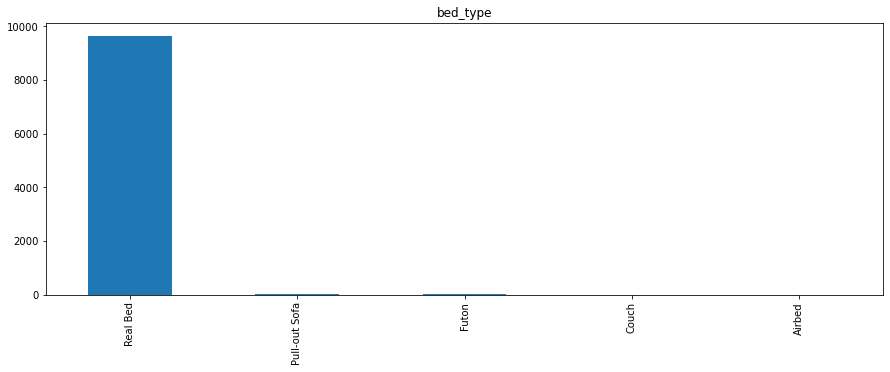

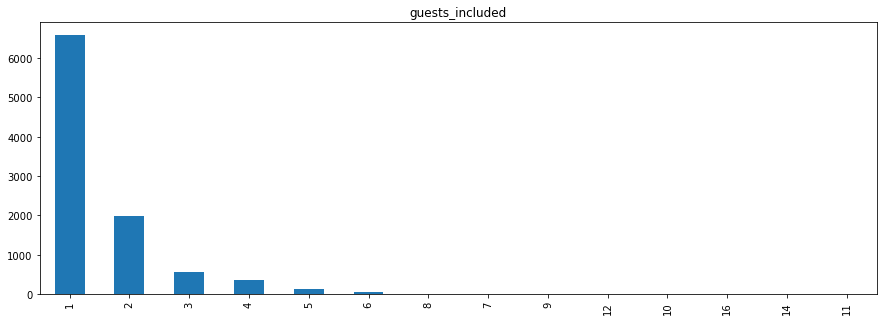

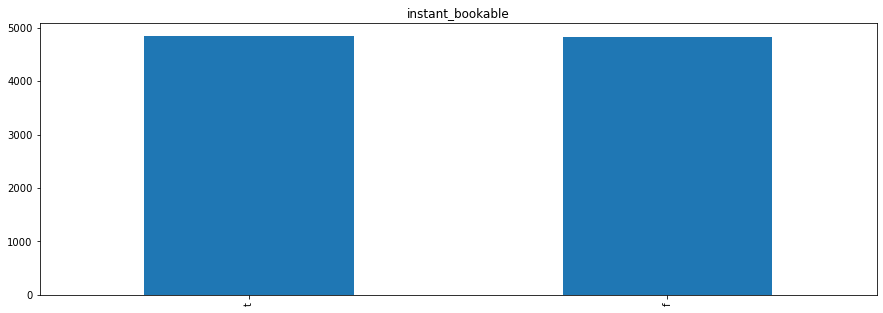

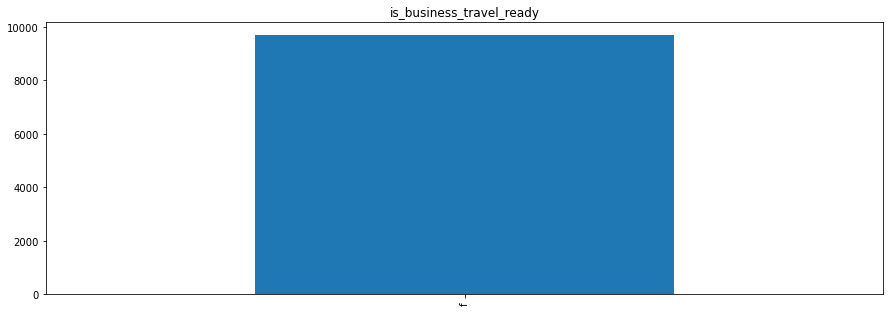

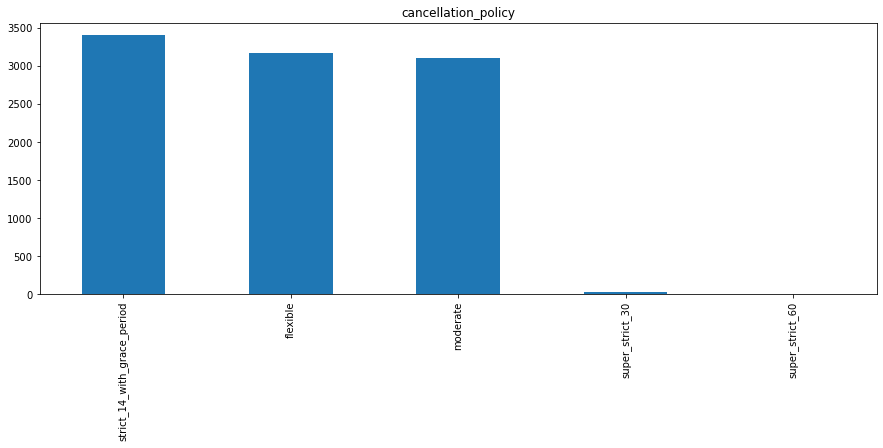

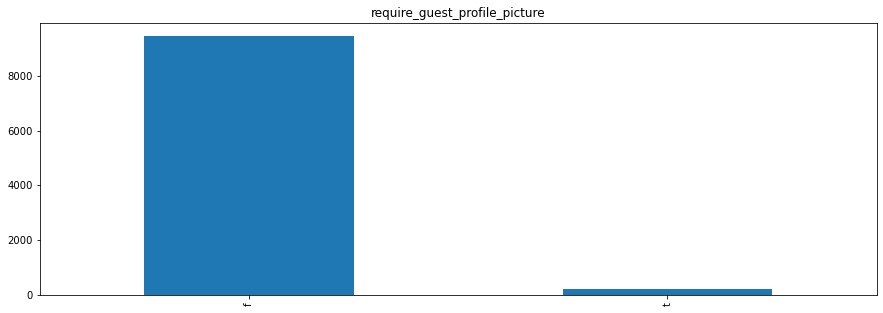

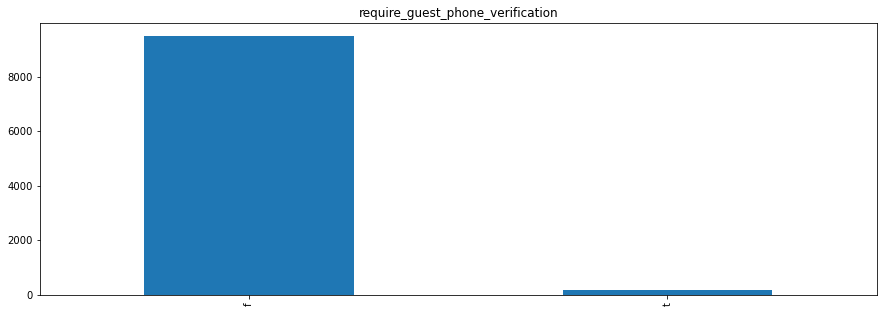

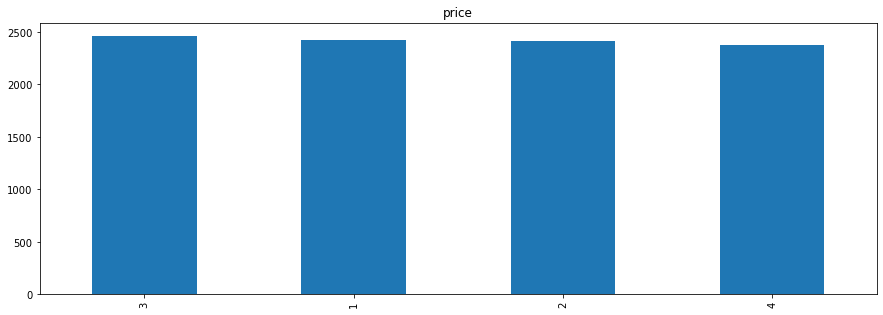

In [96]:
#nei = train_data['neighbourhood'].value_counts()

#nei.plot.bar(figsize = (15,5))
columns = list(train_data)
for i in columns:
    #print(i)
    uni = train_data[i].value_counts()
    if (uni.size<=50):
        print(i)
        plt.figure()
        plt.title(i)
        uni.plot.bar(figsize=(15,5))

Neighbourhoods, idk what to do about this
probably something dumb 
who knows

Min Nights, we likely want a sepearate variable for greater than 5, as there doesn't seem to be that many above 5


Create new variable for caluclated host listings count greater than 6,

Bathrooms, greater than 3 bathrooms, 

Bedrooms, greater than 4 bedrooms, Beds, greater than 7 

Beds, greater than 6 beds 

Bed type, might not be that informative Guests included, greater than 5 guests 

Guests_included maybe do something greater than 5

Business travel ready, get rid of 

cancellation policy (combine super strict)

require guest profile pic and phone verfication 9consider getting rid of)

number_of_reviews 248 int64
last_review 1190 object
reviews_per_month 504 float64
availability_365 361 int64
host_since 2762 object
cleaning_fee 589 int64
extra_people 348 int64
maximum_nights 168 int64


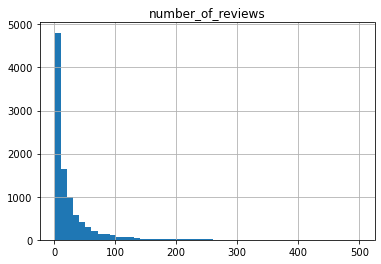

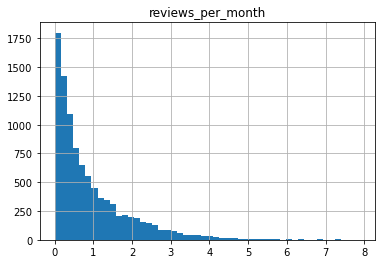

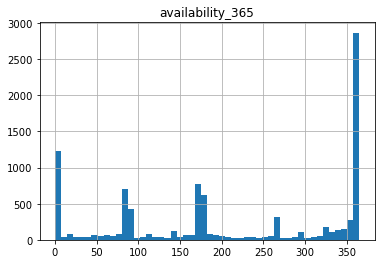

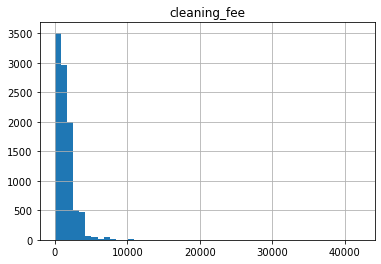

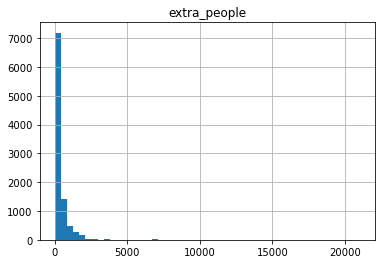

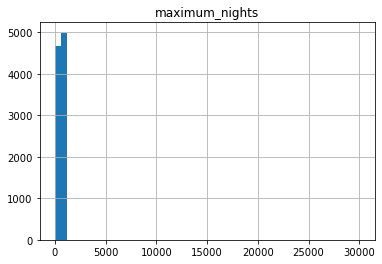

In [97]:
columns = list(train_data)
for i in columns:
    #print(i)
    uni = train_data[i].value_counts()
    if (uni.size>50):
        print(i, uni.size, train_data[i].dtypes)
        if(train_data[i].dtypes == 'int64' or train_data[i].dtypes == 'float64'):
            #plt.figure()
            train_data.hist(column=i, bins = 50)

(9676, 24)
(3413, 24)
(9629, 24)
(9464, 24)
(2087, 24)
(6095, 24)


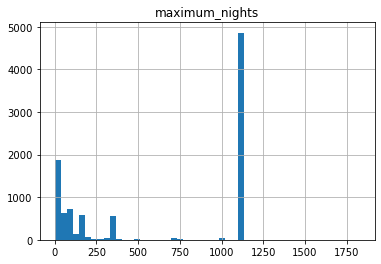

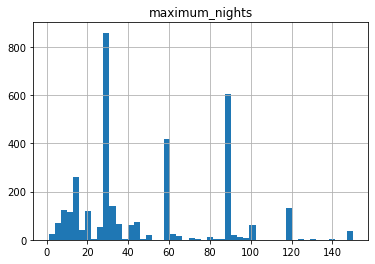

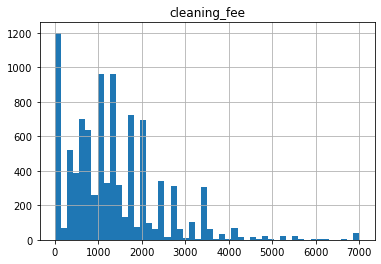

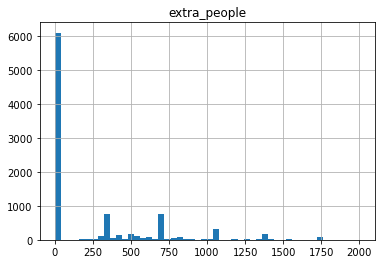

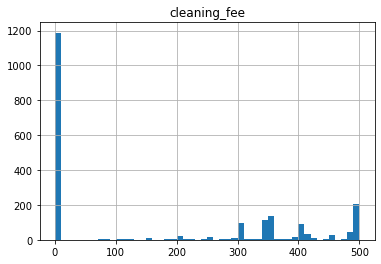

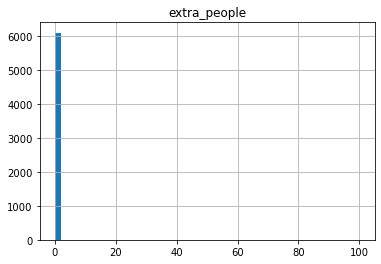

In [217]:
new_col = ['maximum_nights','maximum_nights','cleaning_fee','extra_people','cleaning_fee','extra_people']
cutoff = [2000, 150, 7000, 2000,500,100]
for j in range(len(new_col)):
    i = new_col[j]
    cut = cutoff[j]
    training_data_aug = train_data[train_data[i] <= cut]
    print(training_data_aug.shape)
        #plt.figure()
    training_data_aug.hist(column=i, bins = 50)

let's discretize maximum_nights to go from 0 to 100, 100-250, 250-500, 500-1000, 1000-1250, >1250

cleaning_fee, 0-100, 100-500,500-1000,1000-2000,2000-3000,3000-4000,4000-7000, >7000

extra_people (apparently gives cost of additional person per night )from 0-1, 1-200, 200-300, 300-400, 400-500, 500-600, 600-700, 700-800, 800-1000, 1000-1250, 1250-1500, >1500

roughly


we're still left with last_review and host_since features to try to resolve 

In [144]:
print(train_data['last_review'])
print(train_data['last_review'][2][2])
print(train_data['host_since'])
x = train_data['last_review'][2]
print(x)
print(type(x))
x =x.split('/')
print(x[2])

0        5/12/20
1         7/1/19
2       11/23/19
3        11/1/19
4       12/26/19
          ...   
9676      6/3/20
9677      1/2/20
9678     3/16/20
9679      4/5/20
9680      7/2/18
Name: last_review, Length: 9681, dtype: object
/
0         8/1/13
1        2/14/14
2       10/19/17
3         2/1/19
4        1/24/15
          ...   
9676     6/26/19
9677     6/12/11
9678     5/26/14
9679      5/4/16
9680     3/21/16
Name: host_since, Length: 9681, dtype: object
11/23/19
<class 'str'>
19


In [216]:
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')
train_data = train_data.drop(columns='id')

In [213]:

train_data['last_review'] = train_data['last_review'].\
map(lambda x: (int(x.split('/')[2]+x.split('/')[0])) if (int(x.split('/')[2])>17)\
else int(x.split('/')[2]))


train_data['last_review'] = train_data['last_review'].map(lambda x: 15 if x<=15 else x)

0        205
1        197
2       1911
3       1911
4       1912
        ... 
9676     206
9677     201
9678     203
9679     204
9680     187
Name: last_review, Length: 9681, dtype: int64


array([[<AxesSubplot:title={'center':'last_review'}>]], dtype=object)

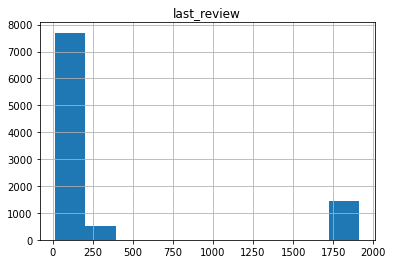

In [214]:
print(train_data['last_review'])

train_data.hist(column='last_review', bins = 10)

In [215]:
train_data['last_review'].value_counts()

203     2973
202     1176
201      880
1912     536
204      416
1911     356
205      321
17       262
197      239
1910     224
198      206
206      201
194      197
1811     169
193      157
199      140
16       138
191      132
195      106
1812     102
192       93
196       91
1810      72
15        72
184       59
187       56
183       53
188       51
181       50
189       48
185       47
182       31
186       27
Name: last_review, dtype: int64

In [160]:
print(train_data['host_since'])
print(train_data['host_since'][2])



0         8/1/13
1        2/14/14
2       10/19/17
3         2/1/19
4        1/24/15
          ...   
9676     6/26/19
9677     6/12/11
9678     5/26/14
9679      5/4/16
9680     3/21/16
Name: host_since, Length: 9681, dtype: object
10/19/17


In [197]:
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')
train_data = train_data.drop(columns='id')

In [198]:
train_data['host_since'] = train_data['host_since'].\
map(lambda x: (int(x.split('/')[2]+x.split('/')[0])) if (int(x.split('/')[2])>17 and (int(x.split('/')[2])<20))\
else int(x.split('/')[2]))

train_data['host_since'] = train_data['host_since'].map(lambda x: 9 if x==8 else x)

0        13
1        14
2        17
3       192
4        15
       ... 
9676    196
9677     11
9678     14
9679     16
9680     16
Name: host_since, Length: 9681, dtype: int64


array([[<AxesSubplot:title={'center':'host_since'}>]], dtype=object)

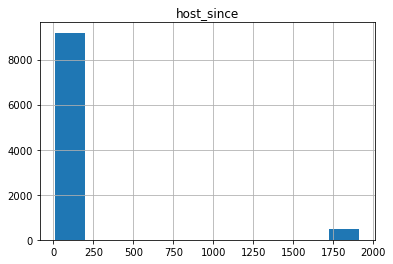

In [199]:
print(train_data['host_since'])

train_data.hist(column='host_since', bins = 10)

In [200]:
train_data['host_since'].value_counts()

16      1550
15      1269
14      1217
17      1085
13       888
12       792
11       481
10       138
188      124
195      111
181      110
1810     109
182      108
191      106
189      104
186      100
194       98
1812      96
1811      96
192       94
193       93
184       87
187       85
199       80
20        79
197       79
196       76
183       76
185       76
1911      67
1910      64
198       64
1912      56
9         23
Name: host_since, dtype: int64